<a href="https://colab.research.google.com/github/woodRock/grokking-deep-learning/blob/main/chapter_5_generalizing_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 | Generalizaing Gradient Descent

If you combine weights in a way that allows you to calculate an error function and a dela, gradient descent can show you how to move the weight combinations and error functions for which gradient descent is useful. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1-1-1 ANN | A simple neural network

Here is the basic gradient descent algorithm for a simple network. This can be generalized to work for multiple inputs, and this can be generalized to handle multiple inputs.

Weight: 0.4996 Pred: 1.0 Error: 0.03999999999999998
Weight: 0.49762387238338596 Pred: 0.9960318722557951 Error: 0.03842849494011237
Weight: 0.49568695240087984 Pred: 0.9921424747005619 Error: 0.036918730584056064
Weight: 0.49378846214797817 Pred: 0.9883302452770646 Error: 0.03546828128611929
Weight: 0.49192763915429966 Pred: 0.9845936529202804 Error: 0.03407481669845295
Weight: 0.4901037360773626 Pred: 0.9809311969424951 Error: 0.03273609802704393
Weight: 0.4883160204024371 Pred: 0.9773414064305966 Error: 0.03144997443478205
Weight: 0.4865637741483538 Pred: 0.9738228396553289 Error: 0.030214379585842166
Weight: 0.48484629357914794 Pred: 0.970374083492265 Error: 0.029027328325829254
Weight: 0.4831628889214261 Pred: 0.9669937528542693 Error: 0.027886913492352745
Weight: 0.4815128840873395 Pred: 0.9636804901352198 Error: 0.026791302850905783
Weight: 0.4798956164030539 Pred: 0.9604329646647669 Error: 0.025738736151126332
Weight: 0.4783104363426074 Pred: 0.9572498721739104 Error: 0.02472752

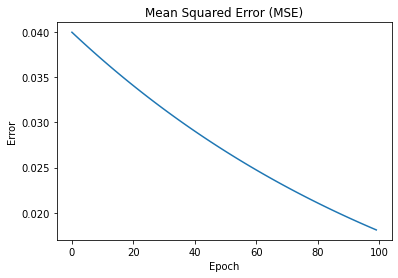

In [6]:
weight, input, goal = (0.5, 2, 0.8)
alpha = 0.001
epochs = 100

def neural_network(weight, input, goal):
    """ A simple 1-1-1 Aritificial Neural Network. 

    Args: 
        weight - the weight for the artificial neuron. 
        input - the input to the network. 
        output - the network output (or prediction). 

    Returns: 
        errors - the history of the networks errors (for plotting).
    """
    errors = [] 
    for epoch in range(epochs):
        pred = input * weight 
        error = (pred - goal) ** 2
        delta = pred - goal # Pure error
        weight_delta = delta * input # Negative reversal, scaling and stopping.
        weight -= weight_delta * alpha

        # Every 5 epochs, print the network state. 
        if epoch % 5 == 0: 
            print(f"Weight: {weight} Pred: {pred} Error: {error}")
        errors.append(error) 

    return errors 

plt.title("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(neural_network(weight, input, goal))

## Mulitple inputs | A more complex neural network

The _delta_ $\Delta$ is a measure of how much higher or lower you want a node's value to be, to predict prefectly given the current training example. 

$ \Delta = (\hat{y} -y) $ 

The _delta weight_ $\Delta w$ is a derived-based estimate of the direction and amount you should move a weight to reduce _delta_, accounting for scaling, negative reversal, and stopping.

For a network with multiple inputs, the process is the same. Instead we can calculate a vector of weight detlas, you multiple them by the learning rate $\alpha$ and substract them from the previous weights.

$ w := w - \alpha \Delta w$

Iteration: 0, pred: 0.8600000000000001, error: 0.01959999999999997, delta: -0.1399999999999999, weights: [0.1, 0.2, -0.1], weight_deltas:[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]
Iteration: 5, pred: 0.9047381217162285, error: 0.009074825454152101, delta: -0.09526187828377153, weights: [0.105131037741109, 0.2003923734743201, -0.09927561820125519], weight_deltas:[-0.809725965412058, -0.061920220884451496, -0.11431425394052583]
Iteration: 10, pred: 0.9351798181846276, error: 0.004201655970577936, delta: -0.06482018181537241, weights: [0.10862241126084446, 0.20065936086112338, -0.09878271841023371], weight_deltas:[-0.5509715454306655, -0.04213311817999207, -0.0777842181784469]
Iteration: 15, pred: 0.9558936266398004, error: 0.0019453721709893272, delta: -0.044106373360199624, weights: [0.11099808839856033, 0.20084103028930164, -0.09844732869667382], weight_deltas:[-0.3749041735616968, -0.028669142684129758, -0.052927648032239545]
Iteration: 20, pred: 0.96998817163872

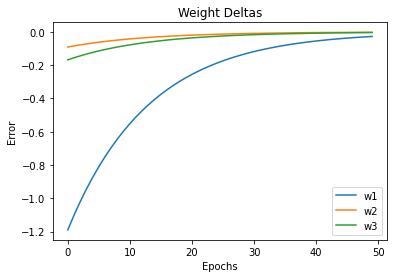

In [32]:
def neural_network(input, weights):
    n = len(input)
    out = sum([i*w for i,w in zip(input,weights[:n])])
    return out    

def ele_mul(scalar, vector):
    out = [0,0,0]
    n = len(out)
    out = [v*scalar for v in vector]
    return out 

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.7, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

alpha = 0.001
weights = [0.1, 0.2, -0.1]
input = [toes[0], wlrec[0], nfans[0]]

errors = []
weight_deltas = []

for i in range(50):
    pred = neural_network(input, weights)
    error = (pred - true) ** 2
    delta = (pred - true)
    weight_delta = ele_mul(delta, input)
    weight_deltas.append(weight_delta)

    if i % 5 == 0:
        print(f"Iteration: {i}, pred: {pred}, error: {error}, delta: {delta}, weights: {weights}, weight_deltas:{weight_delta}")
    weights = [w - alpha * dw for w,dw in zip(weights,weight_delta)]
    errors.append(error)

weight_deltas = np.array(weight_deltas).T
for i,w_d in enumerate(weight_deltas):
    plt.plot(w_d, label=f"w{i+1}")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Weight Deltas")
plt.legend()

We can make curves for each weight delta $\Delta w$ to error $(\hat{y} - y)^2$. Here we see that $w_1$ has the steepest curve, this is because it has the largest input (toes), a higher input value corresponds to a higher derivitive. The toes input has a larger impact than the win record and number of fans. 

More of the learning happens on the weight with the largest input. Normalization is a technique that counteracts this, and encourages learning across all weights. Note, the slope difference between weights meant a smaller learning rate $\alpha = 0.001$ was required to prevent divergence. The network breaks with learning rate $\alpha = 0.01$, it diverges, $w_1$ diverges.

## Freezing Weights

If we freeze the first weight $w_1$, and set learning rate $\alpha=0.1$, the network can still converge on zero error, while only training two weights $w_1, w_2$. Error is shared across all weights, so when one weight finds the optima, all weights find it.

If a network accidentally learns to predict the training data without $w_1$, then it will never learn to encorporate toes $i_1$ into its prediction. 

The goal of a neural network is to find the minima on the error plane. That is the optimal set of parameters $\theta$ that give the lowest error. That error is determined entirely by the training data. 

Iteration: 0, pred: 0.8600000000000001, error: 0.01959999999999997, delta: -0.1399999999999999, weights: [0.1, 0.2, -0.1], weight_deltas:[0, -0.09099999999999994, -0.16799999999999987]
Iteration: 5, pred: 0.9500445306641994, error: 0.002495548916560118, delta: -0.04995546933580064, weights: [0.1, 0.23142493687609642, -0.04198473192105279], weight_deltas:[0, -0.032471055068270416, -0.05994656320296077]
Iteration: 10, pred: 0.9821746505959991, error: 0.0003177430813747165, delta: -0.017825349404000934, weights: [0.1, 0.24263813309390575, -0.02128344659586636], weight_deltas:[0, -0.011586477112600607, -0.02139041928480112]
Iteration: 15, pred: 0.9936394736032037, error: 4.045629604434246e-05, delta: -0.0063605263967962955, weights: [0.1, 0.24663927937829924, -0.013896714993909143], weight_deltas:[0, -0.004134342157917592, -0.007632631676155554]
Iteration: 20, pred: 0.9977304065616093, error: 5.1510543755862416e-06, delta: -0.002269593438390727, weights: [0.1, 0.2480669875248569, -0.011260

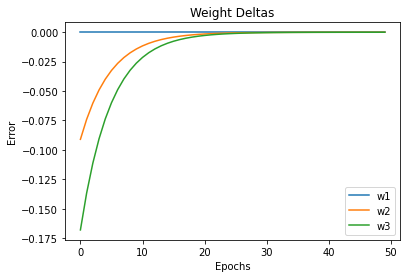

In [34]:
def neural_network(input, weights):
    n = len(input)
    out = sum([i*w for i,w in zip(input,weights[:n])])
    return out    

def ele_mul(scalar, vector):
    out = [0,0,0]
    n = len(out)
    out = [v*scalar for v in vector]
    return out 

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.7, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

alpha = 0.1
weights = [0.1, 0.2, -0.1]
input = [toes[0], wlrec[0], nfans[0]]

errors = []
weight_deltas = []

for i in range(50):
    pred = neural_network(input, weights)
    error = (pred - true) ** 2
    delta = (pred - true)
    weight_delta = ele_mul(delta, input)
    weight_delta[0] = 0 # Freeze the first weight w1.
    weight_deltas.append(weight_delta)

    if i % 5 == 0:
        print(f"Iteration: {i}, pred: {pred}, error: {error}, delta: {delta}, weights: {weights}, weight_deltas:{weight_delta}")
    weights = [w - alpha * dw for w,dw in zip(weights,weight_delta)]
    errors.append(error)

weight_deltas = np.array(weight_deltas).T
for i,w_d in enumerate(weight_deltas):
    plt.plot(w_d, label=f"w{i+1}")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Weight Deltas")
plt.legend()

## Gradient Descent with Multiple Outputs

In [40]:
weights = [0.3, 0.2, 0.9]

def ele_mul(scalar, vector):
    out = [0,0,0]
    n = len(out)
    out = [v*scalar for v in vector]
    return out

def scalar_ele_mul(number, vector):
    output = [number * v for v in vector]
    return output 

def neural_network(input, weights):
    pred = ele_mul(input, weights)
    return pred 

wlrec = [0.6, 1.0, 1.0, 0.9]

hurt = [1.0, 0.0, 0.0, 0.1]
win = [1, 1, 0, 1]
sad = [0.1, 0.0, 0.1, 0.2]

input = wlrec[0]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input, weights)

error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2 
    delta[i] = pred[i] - true[i]

weight_detlas = scalar_ele_mul(input, weights)
alpha = 0.1 

for i in range(len(weights)):
    weights -= weight_deltas[i] * alpha

print(f"Weights: {weights}")
print(f"Weight Deltas: {weight_deltas}") 

Weights: [-0.170925  0.2207    0.004725]
Weight Deltas: [[ 3.8675  -0.17     7.3525 ]
 [ 0.29575 -0.013    0.56225]
 [ 0.546   -0.024    1.038  ]]


## Gradient Descent with Multiple Inputs and Outputs

In [50]:
weights = [[0.1, 0.1, -0.3],
           [0.1, 0.2, 0.0],
           [0.0, 1.3, 0.1]]

def w_sum(a,b):
    assert(len(a) == len(b))
    output = sum([a*b for a,b in zip(a,b)])
    return output

def vect_mat_mul(vect, matrix):
    assert(len(vect) == len(matrix))
    output = [0,0,0]
    for i in range(len(vect)):
        output[i] = w_sum(vect,matrix[i]) 
    return output 

def outer_product(a,b):
    out = np.zeros((len(a), len(b)))
    for i in range(len(a)):
        for j in range(len(b)):
            out[i][j] = a[i] * b[j]
    return out

def neural_network(input, weights):
    pred = vect_mat_mul(input,weights)
    return pred 

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 1.0, 1.0, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt = [0.1, 0.0, 0.0, 0.9]
win = [1,1,0,1]
sad = [0.1, 0.0, 0.1, 0.2]

input = [toes[0], wlrec[0], nfans[0]]
true = [hurt[0], win[0], sad[0]]

epochs = 10
pred = neural_network(input,weights)

error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

weight_deltas = outer_product(input,delta) 

for i in range(len(weights)):
    for j in range(len(weights[0])):
        weights[i][j] -= alpha * weight_deltas[i][j]

print(f"Weights: {weights}")
print(f"Weight Deltas: {weight_deltas}") 

Weights: [[0.09613250000000001, 0.10017000000000001, -0.3073525], [0.09970425000000001, 0.20001300000000002, -0.0005622500000000001], [-0.000546, 1.300024, 0.09896200000000001]]
Weight Deltas: [[ 3.8675  -0.17     7.3525 ]
 [ 0.29575 -0.013    0.56225]
 [ 0.546   -0.024    1.038  ]]


Weights: [[0.09613250000000001, 0.10017000000000001, -0.3073525], [0.09970425000000001, 0.20001300000000002, -0.0005622500000000001], [-0.000546, 1.300024, 0.09896200000000001]]
Weight Deltas: [[ 3.8675  -0.17     7.3525 ]
 [ 0.29575 -0.013    0.56225]
 [ 0.546   -0.024    1.038  ]]
Weights: [[0.06736094977639384, 0.10728482262995952, -0.44754436591392077], [0.09750407262995954, 0.20055707467170283, -0.011282804452241007], [-0.004607865913920871, 1.301028445547759, 0.07917020716509354]]
Weight Deltas: [[ 0.12040098 -0.45654287  6.82349779]
 [ 0.00920713 -0.0349121   0.52179689]
 [ 0.01699779 -0.06445311  0.96331733]]
Weights: [[0.07536670223264576, 0.11721202722955523, -0.5825441420377439], [0.09811627722955528, 0.20131621384696607, -0.021606316744062787], [-0.0034776420377441294, 1.3024299332559368, 0.060111415241730276]]
Weight Deltas: [[-0.68286539 -0.51796912  6.71009547]
 [-0.05221912 -0.0396094   0.51312495]
 [-0.09640453 -0.07312505  0.9473076 ]]
Weights: [[0.09125641251474348, 

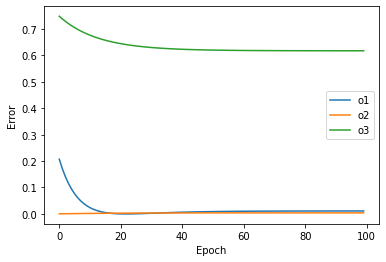

In [76]:
weights = [[0.1, 0.1, -0.3],
           [0.1, 0.2, 0.0],
           [0.0, 1.3, 0.1]]

def w_sum(a,b):
    assert(len(a) == len(b))
    output = sum([a*b for a,b in zip(a,b)])
    return output

def vect_mat_mul(vect, matrix):
    assert(len(vect) == len(matrix))
    output = [0,0,0]
    for i in range(len(vect)):
        output[i] = w_sum(vect,matrix[i]) 
    return output 

def outer_product(a,b):
    out = np.zeros((len(a), len(b)))
    for i in range(len(a)):
        for j in range(len(b)):
            out[i][j] = a[i] * b[j]
    return out

def neural_network(input, weights):
    pred = vect_mat_mul(input,weights)
    return pred 

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 1.0, 1.0, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt = [0.1, 0.0, 0.0, 0.9]
win = [1,1,0,1]
sad = [0.1, 0.0, 0.1, 0.2]

input = [toes[0], wlrec[0], nfans[0]]
true = [hurt[0], win[0], sad[0]]
alpha = 0.001

epochs = 100
errors = []
for e in range(epochs): 
    pred = neural_network(input,weights)

    error = [0, 0, 0]
    delta = [0, 0, 0]

    for i in range(len(true)):
        error[i] = (pred[i] - true[i]) ** 2
        delta[i] = pred[i] - true[i]

    weight_deltas = outer_product(input,delta) 

    for i in range(len(weights)):
        for j in range(len(weights[0])):
            weights[i][j] -= alpha * weight_deltas[i][j]

    errors.append(error)
    if e % 20 == 0:
        print(f"Weights: {weights}")
        print(f"Weight Deltas: {weight_deltas}") 

errors = np.array(errors).T
for i, error in enumerate(errors): 
    plt.plot(error, label=f"o{i+1}")
plt.xlabel("Epoch") 
plt.ylabel("Error")
plt.legend()

## MNIST Project

epoch: 0, Error: 117898.79604003312
epoch: 20, Error: 928.0329487361223
epoch: 40, Error: 577.0182209673684
epoch: 60, Error: 467.8803444707827
epoch: 80, Error: 414.81056500670303
epoch: 100, Error: 383.3443971347064
epoch: 120, Error: 362.7323585764218
epoch: 140, Error: 348.39836683347227
epoch: 160, Error: 337.99267731957445
epoch: 180, Error: 330.1704279283697
epoch: 200, Error: 324.1102364640141
epoch: 220, Error: 319.28850299439097
epoch: 240, Error: 315.36067616462657
epoch: 260, Error: 312.09401699901116
epoch: 280, Error: 309.3276395374281
epoch: 300, Error: 306.94793835323725
epoch: 320, Error: 304.8730751172081
epoch: 340, Error: 303.04296709568104
epoch: 360, Error: 301.41269992051747
epoch: 380, Error: 299.9481159187441
epoch: 400, Error: 298.6228101261958
epoch: 420, Error: 297.41605249668345
epoch: 440, Error: 296.31132910702104
epoch: 460, Error: 295.29530321139276
epoch: 480, Error: 294.357065108794


Text(0, 0.5, 'Error')

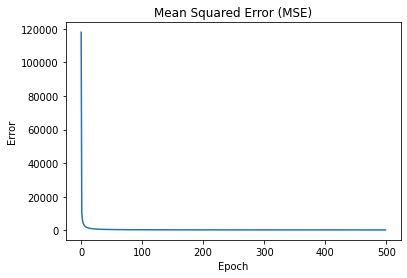

In [116]:
from keras.datasets import mnist
import random
import numpy as np

(images, labels), _ = mnist.load_data()
images = images[:1000]
labels = labels[:1000]
images = [np.concatenate(i) for i in images]
n_i = images[0].shape[0]

def onehot_encoding(labels):
    out = []
    n = len(np.unique(labels))
    for l in labels: 
        label = [0]*n
        label[l-1] = 1
        out.append(label)
    return out, n


def normalize(inputs):
    return np.array(inputs)/255


def neural_network(input, weights):
    output = np.empty(10)
    for idx, weight in enumerate(weights):
        output[idx] = input.dot(weight)
    return output

alpha = 0.01
epochs = 500

images = normalize(images)
labels, n_o = onehot_encoding(labels)
labels = np.array(labels)
weights = np.random.rand(n_o,n_i)
weight_deltas = np.empty_like(weights)

errors = []

for epoch in range(epochs): 
    error_sum = 0
    for image, label in zip(images, labels):
        preds = neural_network(image, weights)
        error = sum((preds - label) ** 2)
        deltas = preds - label
        weight_deltas = np.array([ image * delta for delta in deltas ])
        weights -= weight_deltas * alpha
        error_sum += error
    errors.append(error_sum)

    if epoch % 20 == 0:
        print(f"epoch: {epoch}, Error: {error_sum}")

plt.plot(errors)
plt.title("Mean Squared Error (MSE)")
plt.xlabel("Epoch") 
plt.ylabel("Error")